### Imports and Utility-Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%run ./library/traffic_simulation.py
%run ../utils/helper.py

In [2]:
def draw_points_on_plot(points, ax=None, line_color='blue'):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(points[:, 0], points[:, 1], color=line_color)

    return ax

In [3]:
def visualize_line_change_by_theta(line, theta):
    new_endpoint = calculate_rotated_line(line[0], line[1], theta)
    new_line = [line[1], new_endpoint]
    
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'r-', label='Original Line')

    # Plot the new line
    plt.plot([new_line[0][0], new_line[1][0]], [new_line[0][1], new_line[1][1]], 'b-', label='New Line')
    
    # Plotting points for clarity
    plt.scatter(*line[0], color='red', zorder=5)
    plt.scatter(*line[1], color='red', zorder=5)
    plt.scatter(*new_line[0], color='blue', zorder=5)
    plt.scatter(*new_line[1], color='blue', zorder=5)
    
    # Labeling the points
    plt.text(line[0][0], line[0][1], 'A', fontsize=12, ha='right')
    plt.text(line[1][0], line[1][1], 'B', fontsize=12, ha='right')
    plt.text(new_line[1][0], new_line[1][1], "B'", fontsize=12, ha='right')
    
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Visualizing Line Transformation')
    plt.show()


### Theory

In [4]:
html(calculate_rotated_line)

In [5]:
line = [[0, 0], [0.7071, 0.7071]]
theta = np.radians(0)
visualize_line_change_by_theta(line, theta)

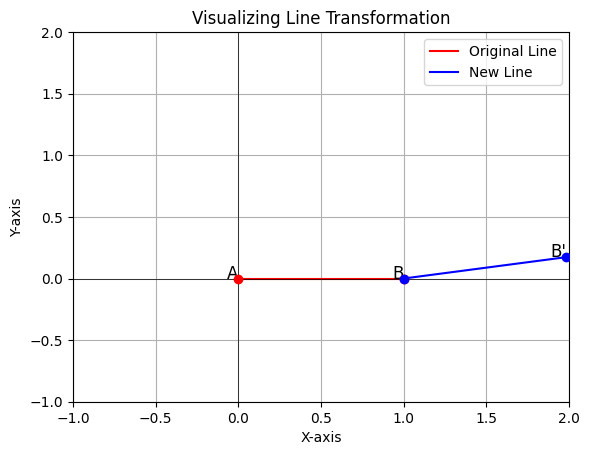

In [6]:
line = [[0, 0], [1, 0]]
theta = np.radians(10)
visualize_line_change_by_theta(line, theta)

### Streets-Building

In [7]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

rotation_angles = np.radians([5] * 50)
init_point_sequence = [[0, 10], [1, 10]] # start with two entries
point_sequence = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_points_on_plot(point_sequence, ax, line_color='blue') # TODO

angle_changes = np.radians([10 for _ in range(20)] + [5 for _ in range(30)] + [-2 for _ in range(20)])
init_point_sequence = [[0, 5], [1, 5]]
point_sequence = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_points_on_plot(point_sequence, ax, line_color='blue') # TODO

plt.show()

### Street-Simulation